# Budzynski T. - MoNS CP PS 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1.a

In [2]:
#reversal potential and max. conductance
E_K = -77 #mV
g_K = 36  #nS

#transition rates
def alpha_n(V):
    V_temp = np.where(V!= -55, V, -55.001)
    return 0.01*(V_temp+55)/(1-np.exp(-0.1*(V_temp+55)))
    

def beta_n(V):
    return 0.125*np.exp(-0.0125*(V+65))          #1/ms

#probability of opening and closing of an ion gate
#default value for the integration check
def dn_dt(n, t, V):
    return alpha_n(V)*(1-n)-beta_n(V)*n

#Hodgkin-Huxley model for potasium
def current_K(n,V):
    return g_K*n**4*(V-E_K)

# b

In [3]:
#activaiton time const.
def tau_n(V):
    return 1/(alpha_n(V)+beta_n(V))

#stady-state activation
def n_infty(V):
    return alpha_n(V)*tau_n(V)

In [4]:
def euler(f_func, x_0, t_max, dt, parameter):
    end_t = int(t_max//dt+1)
    time = np.linspace(0, t_max+dt, end_t)
    x = np.zeros(end_t)
    x[0] = x_0
    for i in range(end_t -1):
        x[i+1] = x[i] + f_func( x[i], (i)*dt, parameter)*dt
    return time, x

def euler_t_dependent(f_func, x_0, t_max, dt, v_steps, V_c):
    #v_steps is a V_c and time dependent function 
    end_t = int(t_max//dt+1)
    time = np.linspace(0, t_max+dt, end_t)
    x = np.zeros(end_t)
    x[0] = x_0
    for i in range(end_t -1):            
            x[i+1] = x[i] + f_func( x[i], i*dt, v_steps(V_c,time[i])) *dt
    return time, x

In [5]:
n_0 = 0.0
V   = -40  #mV
t_max =24 #ms
dt = 0.01  #ms

time, n = euler(dn_dt, n_0, t_max, dt, V)
indx = np.argmin((time-23)**2)
print(f"n_\infty - n(t=23ms)= ", n_infty(-40)," -",n[indx])
print("error after 23 ms is equal", n_infty(-40)-n[indx])

n_\infty - n(t=23ms)=  0.6785909741451827  - 0.6776184924516604
error after 23 ms is equal 0.0009724816935222647


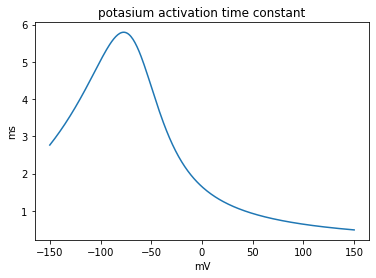

In [6]:
def plot_tau(func_tau, ions_name):
    time=np.arange(-150,151, 1)
    plt.plot(time, func_tau(time), label=func_tau.__name__)
    plt.title(ions_name + " activation time constant")
    plt.ylabel("ms")
    plt.xlabel("mV")
plot_tau(tau_n, "potasium")

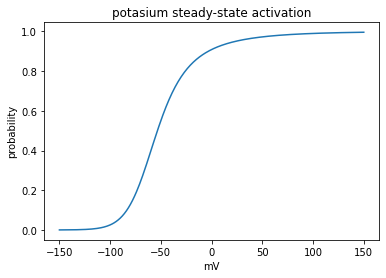

In [7]:
def plot_steady_state_activation(func_infty, ions_name):
    time=np.arange(-150,151, 1)
    plt.plot(time, func_infty(time), label=func_infty.__name__)
    plt.title(ions_name+" steady-state activation")
    plt.xlabel("mV")
    plt.ylabel('probability')
plot_steady_state_activation(n_infty, "potasium")

# (c) Voltage clamp

In [8]:
n_0=0.3177
V_c=-40

In [9]:
def voltage_step(V_c, t):
    v=-65
    if t>=2:
        v=V_c
    return v

Text(0.5, 0, 'ms')

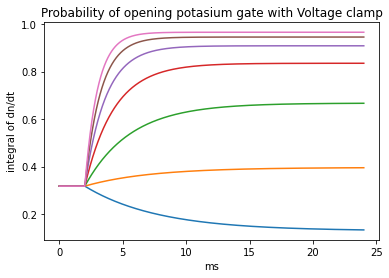

In [10]:
V_c_set = [ -80, -60, -41, -20, 0, 20,40]

for i,V_c in enumerate(V_c_set):    
    time, ns_temp = euler_t_dependent(dn_dt, n_0, t_max, dt, voltage_step, V_c)
    if i==0: ns=ns_temp 
    else: ns=np.vstack((ns,ns_temp))
    plt.plot(time, ns_temp)
    i +=1
plt.title("Probability of opening potasium gate with Voltage clamp")
plt.ylabel("integral of dn/dt")
plt.xlabel("ms")

# d 

Text(0.5, 0.92, 'Currents model with respect to Voltage and time')

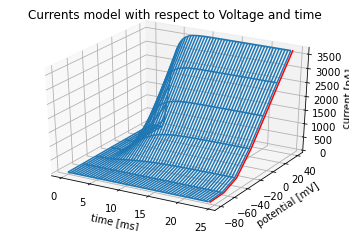

In [11]:
# Instantaneous current
X,Y = np.meshgrid(time,V_c_set)
I_K_1=np.zeros((len(V_c_set)))

# Steady-state 
# place the graph after time max
X_1,Y_1 = np.meshgrid( time[-1]+0.3, V_c_set)

# Make data
for i in range(len(V_c_set)):
    
    I_K = current_K(ns, Y)
    I_K_1[i] = current_K(n_infty(V_c_set[i]), V_c_set[i])


fig=plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_wireframe(X, Y, I_K)
ax.plot( X_1, Y_1, I_K_1, c='r')
ax.set_xlabel("time [ms]")
ax.set_ylabel("potential [mV]")
ax.set_zlabel("current [pA]")
ax.set_title("Currents model with respect to Voltage and time")

The theoretical steady-state current is plotted in red at the end of simulation. We can see that it approximates the instantaneous impressively.

# 2. (a) </br>
Next time, it suits to build a dictionary for gates, those functions or a class, or a list. Which one has more advantages?

In [12]:
def current_Na(V, m, h, E_Na =50, g_Na =120):
    return g_Na*(m**3)*h*(V-E_Na)
def alpha_m(V):
    V_temp = np.where(V!=-40, V, -40.001)
    return 0.1*(V_temp+40)/(1-np.exp(-0.1*(V_temp+40)))
def alpha_h(V):
    return 0.07*np.exp(-0.05*(V+65))
def beta_m(V):
    return 4*np.exp(-0.0556*(V+65))
def beta_h(V):
    return np.divide(1, 1+np.exp(-0.1*(V+35)))
def dm_dt(m, t, V):
    return alpha_m(V)*(1-m)-beta_m(V)*m
def dh_dt(h, t, V):
    return alpha_h(V)*(1-h)-beta_h(V)*h
def tau_m(V):
    return 1/(alpha_m(V)+beta_m(V))
def m_infty(V):
    return alpha_m(V)*tau_m(V)
def tau_h(V):
    return 1/(alpha_h(V)+beta_h(V))
def h_infty(V):
    return alpha_h(V)*tau_h(V)

# calculate limes with V -> infty of alpha_m  (de l'Hospital)

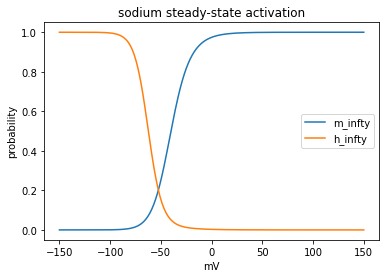

In [13]:
plot_steady_state_activation(m_infty, "sodium")
plot_steady_state_activation(h_infty, "sodium")
plt.legend()

We can see that when the $h_\infty$'s value is close to zero for a depolarizing cell. That's why it acts inhibitory in this model. \
$m_\infty$ is a gating variable, which is activated during depolarization and is inactive, when membrane potential is low.
$m_\infty$ and $h_\infty$ are much steeper than potasium steady-state activation probability $n_\infty$. \
$m_\infty$ appart from a small shift to the left looks similar to $n_\infty$.

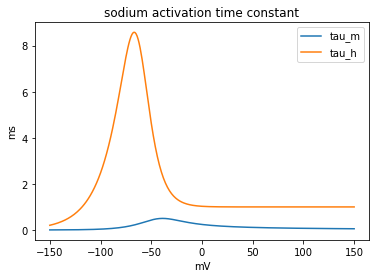

In [14]:
plot_tau(tau_m,"sodium")
plot_tau(tau_h,"sodium")
plt.legend()


$m$ variable is very fast, as it's time constant is small. We expect opening fast opening of potassium channels to transmit action potential. \
$h$ variable is slow around the resting potential of potasium (or common equilibrium state of a neuron). As soon as the cell is depolarizing the time constant of $h$ drops to ~1

# 2. (b)

In [15]:
V = -20     #mV
m_0 = 0.0529
h_0 = 0.5961
# t_max stays the same as in (1)

time, m = euler(dm_dt, m_0, t_max, dt, V)
time, h = euler(dh_dt, h_0, t_max, dt, V)

In [16]:
I_test = current_Na(V, m, h)

Text(0, 0.5, 'pA')

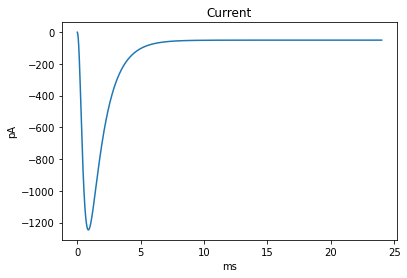

In [17]:
plt.plot(time,I_test)
plt.title("Current")
plt.xlabel("ms")
plt.ylabel('pA')


Let's check the theoretical steady-state activation and the acquired value after 15 ms.

In [18]:
indx_t15 = np.argmin((time-15)**2)
print(
      f"delta I(15 ms) = ",
      I_test[indx_t15],"+", 
      - current_Na(V, m_infty(-20), h_infty(-20))
     )
print( "        = ", I_test[indx_t15]- current_Na(V, m_infty(-20), h_infty(-20)) )
print( "        = circa    0.01 ")
print( " The difference was smaller with dt=0.1. It is more exact now.")

delta I(15 ms) =  -50.498829838774725 + 50.485413405528476
        =  -0.013416433246248971
        = circa    0.01 
 The difference was smaller with dt=0.1. It is more exact now.


# 2. (c)

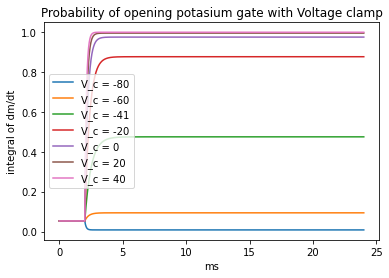

In [19]:
#V_c_set, dt, t_max  the same as for potasium above

for i,V_c in enumerate(V_c_set):
    time, ms_temp = euler_t_dependent(dm_dt, m_0, t_max, dt, voltage_step, V_c)
    if i==0: ms=ms_temp 
    else: ms = np.vstack((ms,ms_temp))

    plt.plot(time, ms_temp, label=f"V_c = {V_c}")
    i +=1

plt.title("Probability of opening potasium gate with Voltage clamp")
plt.ylabel("integral of dm/dt")
plt.xlabel("ms")
plt.legend()

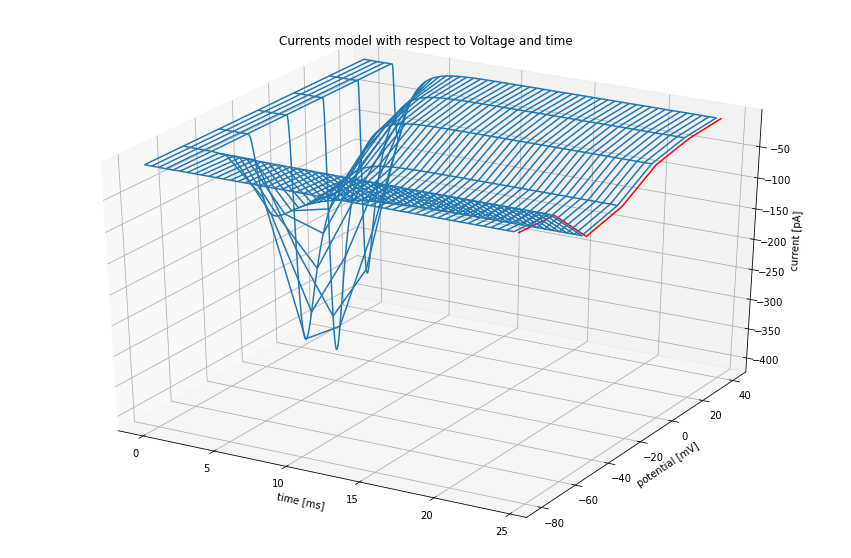

In [20]:
# MAKE DATA
# Instantaneous current
X,Y = np.meshgrid(time,V_c_set)
I_Na = np.zeros((len(V_c_set),len(time)))
I_Na_1=np.zeros((len(V_c_set)))

# Steady-state 
t_1 = np.argmin((time-30)**2)    # place the graph at 30 ms
X_1,Y_1 = np.meshgrid(time[-1]+0.3,V_c_set)

for i in range(len(V_c_set)):
    
    time, h = euler_t_dependent(dh_dt, m_0, t_max, dt, voltage_step, V_c_set[i])
    I_Na[i] = current_Na(V_c_set[i], ms[i], h)
    I_Na_1[i] = current_Na(V_c_set[i], m_infty(V_c_set[i]), h_infty(V_c_set[i]))

# PLOT
def plot(I_Na, I_Na_1):
    fig=plt.figure(figsize=(15,10))
    ax = fig.gca(projection = '3d')
    ax.plot_wireframe(X, Y, I_Na)
    ax.plot( X_1, Y_1, I_Na_1, c='r')
    ax.set_xlabel("time [ms]")
    ax.set_ylabel("potential [mV]")
    ax.set_zlabel("current [pA]")
    ax.set_title("Currents model with respect to Voltage and time")
    plt.show()
plot(I_Na, I_Na_1)

Change of current in respect to desired potential in the model of voltage clamp.
After aplying currents, which make the voltage steady, we see a change, if desired potential is bigger than at least -60mV. Below that value a steady state $m_\infty$ is close to zero and $m$ is fast enough to keep the current very small all the time. 
Around the clamped 40 mV and above we see that initially channels open, because of $m$ approaching it's steady-state before $h$, which multiplies all other terms by a fraction close to zero.
In between -60 and 0 mV, the current after initial growth and decrease stabilizes giving the value predicted theretically. Namely, $g_{Na}*m_\infty^3h_\infty*(V-E)$, as both gate variables have non-negligible values.
# 2. (d) 
Above one can see instantaneous I-V curves (in planes perpendicular to time) and in red the theoretical steady-state current dependent on voltage. One could use an $L^2$ norm to see how fast (in time) the difference between those funcitons approaches $0$. 

# 2. (e)

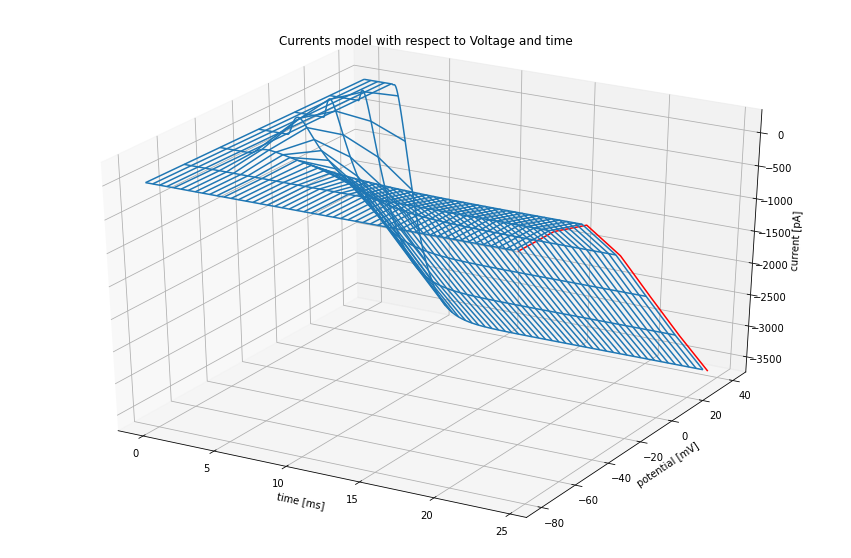

In [21]:
plot(-I_K-I_Na, -I_K_1- I_Na_1)

In a membrane model, after inital increase, in current it drops to a steady-state, which is dominated by potasium, especially for bigger voltage. 
In a neuron, this could prevent further action potentials and leads to big expense of ATP, as ion pumps needs to reverse the flow.